[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnnyUrosevic/Machine-Learning-Shenanigans/blob/master/stock_prediction_lstm.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [2]:
#collect data
from google.colab import files
files.upload()

{}

In [3]:
#format data
data = pd.read_csv('NFLX_data.csv')
values = data['close']

min_val = values.min()
max_val = values.max()

#scale data between 0 and 1
values = (values-values.min())/(values.max()-values.min())

def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb)])
    return np.array(X),np.array(Y)
X,y = processData(values,7)

X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.00979159 0.00810767 0.00814059 ... 0.01330715 0.01446178 0.01825518]
 [0.00810767 0.00814059 0.01268869 ... 0.01446178 0.01825518 0.01315406]
 [0.00814059 0.01268869 0.01330715 ... 0.01825518 0.01315406 0.01317052]
 ...
 [0.44480525 0.44266209 0.4560186  ... 0.44935948 0.44962738 0.44358059]
 [0.44266209 0.4560186  0.45131129 ... 0.44962738 0.44358059 0.44759902]
 [0.4560186  0.45131129 0.44935948 ... 0.44358059 0.44759902 0.45035452]]
[[0.45131129 0.44935948 0.44962738 ... 0.44759902 0.45035452 0.46195058]
 [0.44935948 0.44962738 0.44358059 ... 0.45035452 0.46195058 0.46478262]
 [0.44962738 0.44358059 0.44759902 ... 0.46195058 0.46478262 0.46248637]
 ...
 [0.91086727 0.94301475 0.96176745 ... 0.9778412  0.945311   0.92529536]
 [0.94301475 0.96176745 1.         ... 0.945311   0.92529536 0.93432728]
 [0.96176745 1.         0.9778412  ... 0.92529536 0.93432728 0.88392461]]
[1.31540626e-02 1.31705191e-02 9.18499616e-03 8.88954545e-03
 1.14973189e-02 1.16232299e-02 1.36787555e-02 1.438

In [0]:
# Define Model
model = keras.Sequential()
model.add(keras.layers.LSTM(1024,input_shape=(7,1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))



In [5]:
#train model
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/20
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 2/20
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0027 - val_loss: 0.0045
Epoch 3/20
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 4/20
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0025 - val_loss: 0.0069
Epoch 5/20
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 6/20
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 7/20
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 8/20
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 9/20
1000/1000 [==============================] - 20s 20ms/step - loss: 6.4122e-04 - val_loss: 0.0020
Epoch 10/20
1

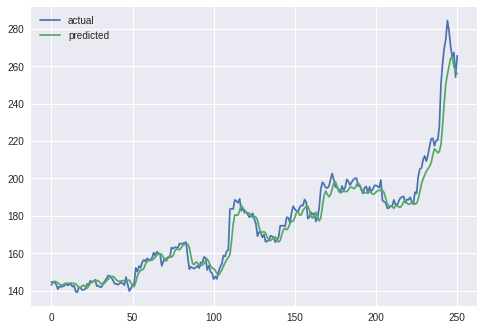

loss: 0.0546984093740837


In [15]:
Xt = model.predict(X_test)
plt.plot(y_test.reshape(-1,1) * (max_val - min_val) + min_val, label="actual")
plt.plot(Xt * (max_val - min_val) + min_val, label="predicted")
plt.legend()
plt.show()
print("loss: {}".format(history.history['loss'][len(history.history['loss']) - 1] * (max_val - min_val)))